<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Decision%20Tree%20(CompanyData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing 

In [85]:
Comp_Data= pd.read_csv("Company_Data.csv")

In [83]:
Comp_Data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [86]:
Comp_Data.loc[Comp_Data["Sales"] <= 10.00,"Sales1"]="Not High"
Comp_Data.loc[Comp_Data["Sales"] >= 10.01,"Sales1"]="High"

In [87]:
Comp_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


In [88]:
label_encoder = preprocessing.LabelEncoder()
Comp_Data["ShelveLoc"] = label_encoder.fit_transform(Comp_Data["ShelveLoc"])
Comp_Data["Urban"] = label_encoder.fit_transform(Comp_Data["Urban"])
Comp_Data["US"] = label_encoder.fit_transform(Comp_Data["US"])
Comp_Data["Sales1"] = label_encoder.fit_transform(Comp_Data["Sales1"])


In [150]:
Comp_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [151]:
x=Comp_Data.iloc[:,1:11]
y=Comp_Data["Sales1"]

In [128]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [129]:
Comp_Data.Sales1.value_counts()

1    322
0     78
Name: Sales1, dtype: int64

In [130]:
Comp_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  Sales1       400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [131]:
colnames=list(Comp_Data.columns)

In [132]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales1']

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [134]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

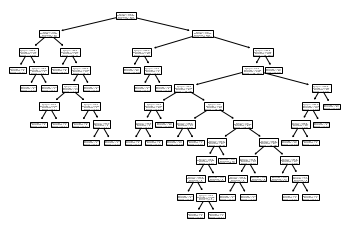

In [135]:
tree.plot_tree(model);

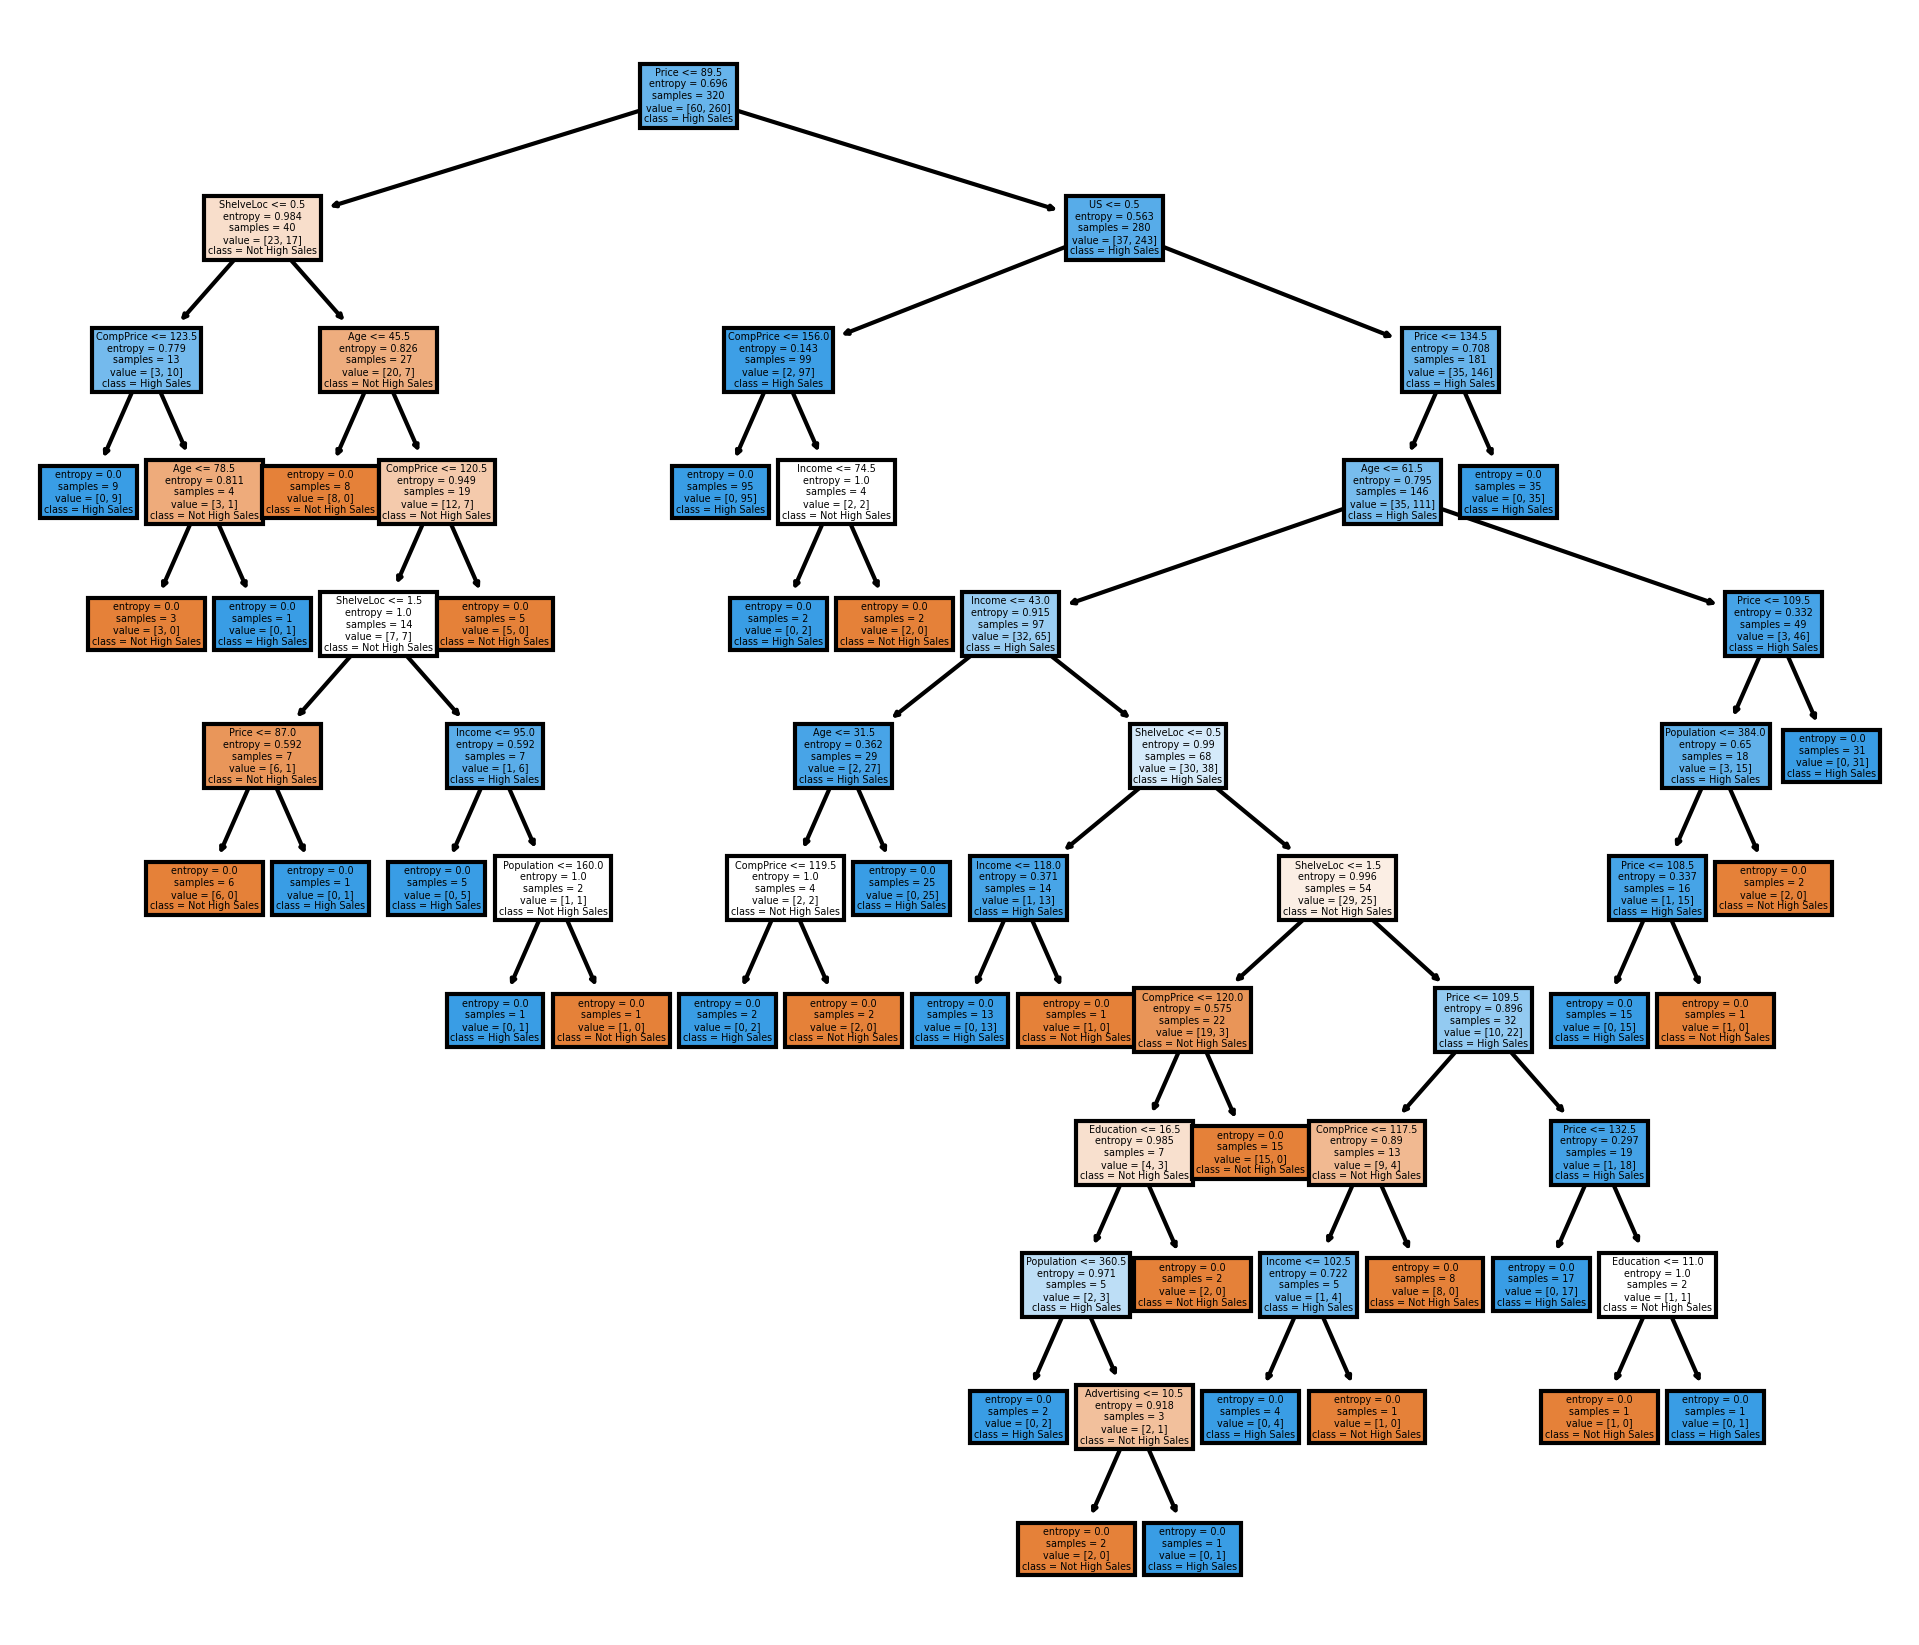

In [136]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High Sales', 'High Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [137]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    67
0    13
dtype: int64

In [138]:
pd.Series(y_test).value_counts()

1    62
0    18
Name: Sales1, dtype: int64

In [139]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales1,,
0,7,11
1,6,56


In [140]:
np.mean(preds==y_test)

0.7875

## Building Decision Tree Classifier (CART) using Gini Criteria

In [149]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [153]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6875

# Decision Tree Regression

In [105]:
array=Comp_Data.values

In [141]:
X=array[:,1:11]
y=array[:,-1]

In [142]:
X

array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

In [143]:
y

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [145]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()

In [146]:
model1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [148]:
#Find the accuracy
model1.score(X_test,y_test)

-0.17187499999999978

This Dataset is not Good for Decision Tree Regrssion 